In [1]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Analyze the Data

In [2]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)


Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [3]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

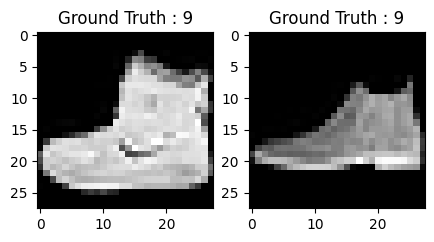

In [4]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))


Data Preprocessing

In [5]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])


Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [7]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

Model the Data

In [8]:
import keras
from keras.layers import Input
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential,Model
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
batch_size = 64
epochs = 20
num_classes = 10


In [9]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))


In [10]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [11]:
fashion_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                   

In [12]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
750/750 [==============================] - 92s 121ms/step - loss: 0.4615 - accuracy: 0.8308 - val_loss: 0.3551 - val_accuracy: 0.8671
Epoch 2/20
750/750 [==============================] - 77s 103ms/step - loss: 0.2858 - accuracy: 0.8957 - val_loss: 0.2820 - val_accuracy: 0.8957
Epoch 3/20
750/750 [==============================] - 78s 104ms/step - loss: 0.2402 - accuracy: 0.9112 - val_loss: 0.2435 - val_accuracy: 0.9115
Epoch 4/20
750/750 [==============================] - 77s 103ms/step - loss: 0.2069 - accuracy: 0.9234 - val_loss: 0.2309 - val_accuracy: 0.9149
Epoch 5/20
750/750 [==============================] - 76s 102ms/step - loss: 0.1808 - accuracy: 0.9340 - val_loss: 0.2306 - val_accuracy: 0.9187
Epoch 6/20
750/750 [==============================] - 76s 102ms/step - loss: 0.1586 - accuracy: 0.9408 - val_loss: 0.2139 - val_accuracy: 0.9243
Epoch 7/20
750/750 [==============================] - 77s 103ms/step - loss: 0.1386 - accuracy: 0.9489 - val_loss: 0.2365 - val_ac

In [13]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)


In [14]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.4686634838581085
Test accuracy: 0.9136999845504761


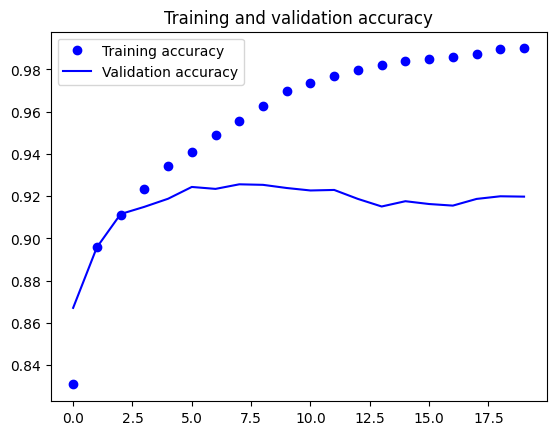

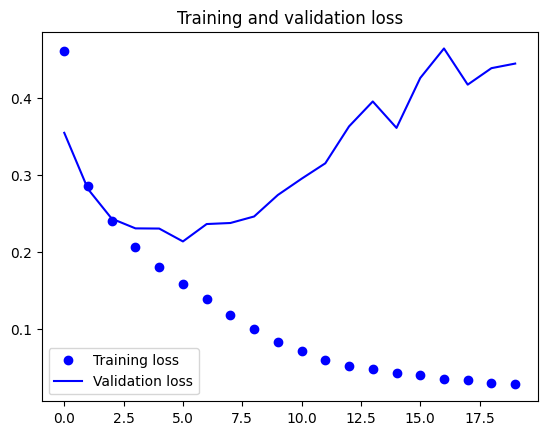

In [15]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


conf 2

In [16]:
fashion_model = Sequential()
fashion_model.add(Conv2D(63, kernel_size=(3, 3), strides=(1, 1), activation='linear', input_shape=(28, 28, 1), padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2), padding='same'))

fashion_model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

fashion_model.add(Conv2D(256, (3, 3), strides=(1, 1), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

fashion_model.add(Flatten())
fashion_model.add(Dense(256, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [17]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [18]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 63)        630       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 63)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 63)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       72704     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                 

In [ ]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=20,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 280s 373ms/step - loss: 2.3031 - accuracy: 0.0977 - val_loss: 2.3027 - val_accuracy: 0.1007
Epoch 2/20
750/750 [==============================] - 278s 371ms/step - loss: 2.3031 - accuracy: 0.1002 - val_loss: 2.3080 - val_accuracy: 0.0983
Epoch 3/20
750/750 [==============================] - 282s 376ms/step - loss: 2.3034 - accuracy: 0.0991 - val_loss: 2.3045 - val_accuracy: 0.0983
Epoch 4/20
750/750 [==============================] - 276s 368ms/step - loss: 2.3032 - accuracy: 0.0970 - val_loss: 2.3030 - val_accuracy: 0.0980
Epoch 5/20
750/750 [==============================] - 279s 373ms/step - loss: 2.3030 - accuracy: 0.1007 - val_loss: 2.3039 - val_accuracy: 0.0980
Epoch 6/20
750/750 [==============================] - 279s 372ms/step - loss: 2.3032 - accuracy: 0.0990 - val_loss: 2.3029 - val_accuracy: 0.0990
Epoch 7/20
750/750 [==============================] - 280s 373ms/step - loss: 2.3062 - accuracy: 0.0986 - val_loss: 2.3050 -

In [ ]:
test_eval1 = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 18s 56ms/step - loss: 2.3027 - accuracy: 0.1000


In [ ]:
print('Test loss:', test_eval1[0])
print('Test accuracy:', test_eval1[1])


Test loss: 2.302737236022949
Test accuracy: 0.10000000149011612


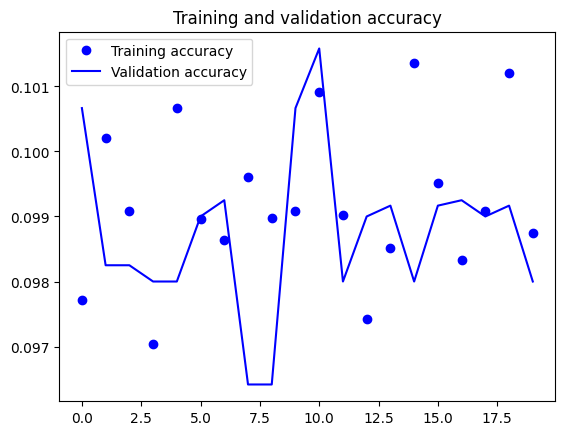

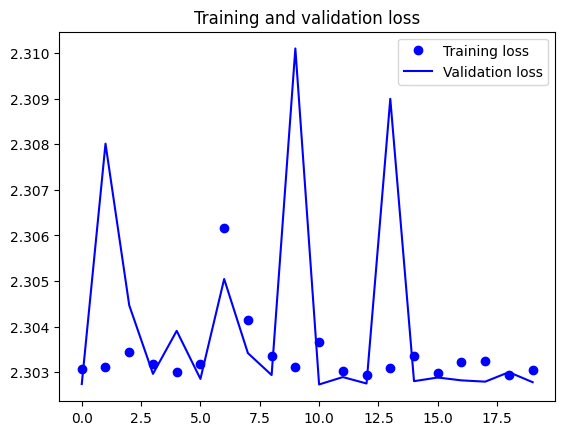

In [ ]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

conf3

In [ ]:

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(2, 2), strides=(1, 1), activation='sigmoid', input_shape=(28, 28, 1), padding='same'))
fashion_model.add(MaxPooling2D((2, 2), padding='same'))

fashion_model.add(Conv2D(64, (2, 2), strides=(1, 1), activation='sigmoid', padding='same'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

fashion_model.add(Conv2D(256, (2, 2), strides=(1, 1), activation='sigmoid', padding='same'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

fashion_model.add(Flatten())
fashion_model.add(Dense(256))
fashion_model.add(Activation('sigmoid'))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         65792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 256)        

In [ ]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=20,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 51s 67ms/step - loss: 2.3229 - accuracy: 0.0995 - val_loss: 2.3075 - val_accuracy: 0.0964
Epoch 2/20
750/750 [==============================] - 48s 65ms/step - loss: 2.3124 - accuracy: 0.1014 - val_loss: 2.3140 - val_accuracy: 0.0983
Epoch 3/20
750/750 [==============================] - 48s 64ms/step - loss: 2.3126 - accuracy: 0.1007 - val_loss: 2.3056 - val_accuracy: 0.0983
Epoch 4/20
750/750 [==============================] - 47s 62ms/step - loss: 1.9080 - accuracy: 0.2613 - val_loss: 0.6283 - val_accuracy: 0.7685
Epoch 5/20
750/750 [==============================] - 46s 61ms/step - loss: 0.5172 - accuracy: 0.8057 - val_loss: 0.4808 - val_accuracy: 0.8219
Epoch 6/20
750/750 [==============================] - 47s 63ms/step - loss: 0.4340 - accuracy: 0.8376 - val_loss: 0.4575 - val_accuracy: 0.8327
Epoch 7/20
750/750 [==============================] - 49s 65ms/step - loss: 0.4035 - accuracy: 0.8502 - val_loss: 0.4131 - val_accuracy:

In [ ]:
test_eval2 = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 5s 15ms/step - loss: 0.3511 - accuracy: 0.8688


In [ ]:
print('Test loss:', test_eval2[0])
print('Test accuracy:', test_eval2[1])

Test loss: 0.3511310815811157
Test accuracy: 0.8687999844551086


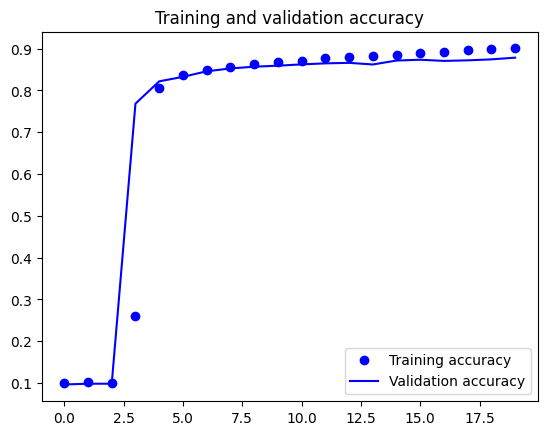

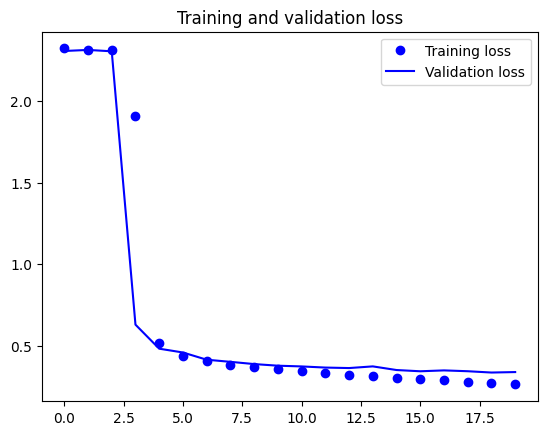

In [ ]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()